<a href="https://colab.research.google.com/github/SurekhaBerlin/NPower-Python-Practices/blob/main/Binning_%26Merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binning in Data Wrangling (Discretization)

**Data Smoothing**
Binning is a technique used to convert continuous numerical data into categorical bins (or groups). This helps in reducing complexity, identifying patterns, and improving interpretability.

**Why Use Binning?**

Helps in categorizing continuous values (e.g., Age Groups, Income Brackets).
Reduces noise in data by grouping similar values.
Can be useful for decision trees and categorical modeling.

#Types of Binning
**1. Equal-Width Binning (Divides range into equal-sized bins)**


Divides data range into equal-sized intervals.

The number of data points in each bin may not be the same.

Formula for bin width:

​
 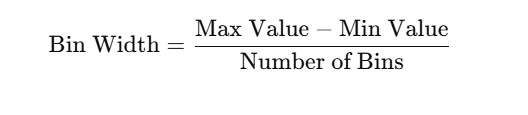


**cut:** This method requires you to specify the bin edges. It will then categorize each value into one of these bins.

Bins may have unequal distribution of values

In [ ]:
import pandas as pd

df = pd.DataFrame({'Age': [5, 12, 20, 25, 37, 45, 50, 60, 72, 85,87,45,34,23,90,12,10]})

#If the data is not sorted then sort it

# Sort by Age in ascending order
df= df.sort_values(by='Age')
#number of bins equally divided.. so 4 bins

df['Age_Group'] = pd.cut(df['Age'], bins=4, labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
print(df)


    Age    Age_Group
0     5        Young
16   10        Young
15   12        Young
1    12        Young
2    20        Young
13   23        Young
3    25        Young
12   34        Adult
4    37        Adult
5    45        Adult
11   45        Adult
6    50  Middle-Aged
7    60  Middle-Aged
8    72       Senior
9    85       Senior
10   87       Senior
14   90       Senior


In [ ]:
import pandas as pd
df=pd.read_csv("ChicagoPublicSchools.csv")

df['SAFETY_SCORE'].describe()

df= df.sort_values(by='SAFETY_SCORE')
df['SAFETY'] = pd.cut(df['SAFETY_SCORE'], bins=4, labels=['safe', 'very safe', 'Not Safe', 'Dangerous'])
df[['SAFETY_SCORE','SAFETY']].head(20)
df.groupby('SAFETY').agg({"count"})

/tmp/ipython-input-274098696.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('SAFETY').agg({"count"})


,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
SAFETY,,,,,,,,,,,,,,,,,,,,,
safe,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
very safe,251,251,251,251,251,251,251,251,250,251,...,251,251,251,251,251,251,251,251,251,251
Not Safe,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
Dangerous,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56


--Bins are equally spaced (e.g., 0-25, 26-50, etc.).

--Problem: If data is skewed, bins may be unbalanced.

**2. Equal-Frequency Binning (Each bin contains an equal number of data points)**

--Each bin contains approximately the same number of data points.

--Good for skewed data, ensuring balance in each bin.

--Uses quartiles, deciles, or other quantiles.

**qcut()**
Divides data into quantiles (bins with approximately equal numbers of observations).

Automatically determines bin edges so that each bin has an equal number of elements.

In [ ]:
# Sort by UPrice in ascending order
df= df.sort_values(by='Age')
df['Age_Group'] = pd.qcut(df['Age'], q=4, labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
print(df)

    Age    Age_Group
0     5        Young
16   10        Young
15   12        Young
1    12        Young
2    20        Young
13   23        Adult
3    25        Adult
12   34        Adult
4    37        Adult
5    45  Middle-Aged
11   45  Middle-Aged
6    50  Middle-Aged
7    60  Middle-Aged
8    72       Senior
9    85       Senior
10   87       Senior
14   90       Senior


--Each bin has roughly the same number of data points.

Good when data is not evenly distributed.

In [ ]:
import pandas as pd
df=pd.read_csv("ChicagoPublicSchools.csv")

df['SAFETY_SCORE'].describe()
df= df.sort_values(by='SAFETY_SCORE')
df['SAFETY'] = pd.qcut(df['SAFETY_SCORE'], q=4, labels=['safe', 'very safe', 'Not Safe', 'Dangerous'])
df[['SAFETY_SCORE','SAFETY']].head(20)
df.groupby('SAFETY').agg({"count"})

<ipython-input-12-b13151629b50>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('SAFETY').agg({"count"})


,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Freshman_on_Track_Rate__,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
SAFETY,,,,,,,,,,,,,,,,,,,,,
safe,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
very safe,132,132,132,132,132,132,132,132,131,132,...,132,132,132,132,132,132,132,132,132,132
Not Safe,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
Dangerous,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128


**3. Custom Binning (Define bins manually)**

In [ ]:
bins = [0, 18, 35, 60, 100]  # Custom age categories
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Age,Age_Group
0,5,Teen
1,12,Teen
2,20,Young Adult
3,25,Young Adult
4,37,Adult
5,45,Adult
6,50,Adult
7,60,Adult
8,72,Senior
9,85,Senior


**linspace**

linspace() generates evenly spaced values between a start and an end value, which is exactly what you need when you want to create bins of equal width.

So, if you want to manually define bins with equal width for the cut() method, you would use linspace() to determine the bin edges.



In [ ]:
import pandas as pd
import numpy as np

# Sample data
data = np.random.randint(1, 100, 10)

# Generate 5 equally spaced bins using linspace
bins = np.linspace(data.min(), data.max(), 6)  # 6 because we need 5 intervals

# Apply cut to categorize the data
categories = pd.cut(data, bins)

# Display the result
df = pd.DataFrame({'Data': data, 'Category': categories})
print(df)


--More control over ranges and labels.

**Best Practices for Binning**

Use cut() when:

✅ You have predefined numeric ranges (e.g., age groups: 0-18, 19-35, etc.).

✅ You need fixed intervals regardless of data distribution.

✅ Example: Categorizing temperatures into "Cold," "Warm," and "Hot" based on fixed values.

Use qcut() when:

✅ You want equal-sized groups (e.g., quartiles, percentiles).

✅ Your data is skewed, and you want each bin to have a similar number of values.

✅ Example: Splitting customer incomes into four quartiles for analysis.

Which is better?

👉 If you need meaningful category boundaries (e.g., ages, temperature ranges), use cut().

👉 If you want equal-sized groups for statistical analysis, use qcut().

**MERGING**
Yes! Merging and joining are essential topics in data wrangling, especially when working with multiple datasets. You can definitely teach these concepts using pandas in Python.

In [ ]:
import pandas as pd

# Customer details
customers = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'City': ['Toronto', 'Vancouver', 'Calgary', 'Montreal']
})

# Purchases made by customers
purchases = pd.DataFrame({
    'CustomerID': [1, 2, 2, 4, 5],
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Keyboard']
})

# Merging on CustomerID
merged_df = pd.merge(customers, purchases, on='CustomerID', how='inner')

print(merged_df)


   CustomerID   Name       City  Product
0           1  Alice    Toronto   Laptop
1           2    Bob  Vancouver    Phone
2           2    Bob  Vancouver   Tablet
3           4  David   Montreal  Monitor


Key how Options in merge():

inner (default) → Only matching records (intersection).

left → All records from the left DataFrame, with NaN for missing right-side values.

right → All records from the right DataFrame, with NaN for missing left-side values.

outer → All records from both DataFrames (union).

**Joining DataFrames (Using join())**
Scenario: You have two datasets—one with employee names and another with their salaries.

In [ ]:
employees = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                          'Department': ['HR', 'IT', 'Finance']})

salaries = pd.DataFrame({'Salary': [60000, 75000, 50000]},
                         index=['Alice', 'Bob', 'Charlie'])

# Join salaries with employees using index
result = employees.set_index('Name').join(salaries)

print(result)


        Department  Salary
Name                      
Alice           HR   60000
Bob             IT   75000
Charlie    Finance   50000


**Understanding Index in join() vs. merge()**

When using join(), it matches the index of one DataFrame with the index or column of another. This makes it useful when one DataFrame has an index that aligns with another's data.

In contrast, merge() works on columns explicitly, not on index values

**BUT**
Instead of using join(), you can reset the index and use merge() instead. This is useful if you prefer explicit column-based merging rather than index-based joining.

In [ ]:
import pandas as pd

# Creating Employees DataFrame
employees = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Department': ['HR', 'IT', 'Finance']
}).set_index('Name')  # Setting 'Name' as index

# Creating Salaries DataFrame
salaries = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Salary': [60000, 75000, 50000]
}).set_index('Name')  # Setting 'Name' as index

# Reset index to use 'Name' as a column before merging
employees_reset = employees.reset_index()
salaries_reset = salaries.reset_index()

# Merge on 'Name' column
result = pd.merge(employees_reset, salaries_reset, on='Name')

print(result)



      Name Department  Salary
0    Alice         HR   60000
1      Bob         IT   75000
2  Charlie    Finance   50000
